In [127]:
import matplotlib.image as mpimg 
import os
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import h5py
import os
from sklearn import svm
from sklearn.svm import SVC
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  GridSearchCV
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import pickle
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import itertools
from sklearn.metrics import roc_curve, auc


In [76]:
train_set = []
labels = []
class_label = 0
                                          
parameters = {'C' : [1000, 500, 100, 50, 20, 10, 4, 3.5, 3, 2.5, 2, 1, 0.1, 0.005, 0.003],  'gamma' : [10, 4, 3.5, 3, 2.5, 2, 1, 0.1, 0.005, 0.003] }
classifier = GridSearchCV(svm.SVC(kernel = 'rbf'), parameters, cv=5)

for folder in os.listdir('Train_val_Handwritten_Hindi_dataset\Train_val\\'):
    path = 'Train_val_Handwritten_Hindi_dataset\Train_val\\' + folder + '\\'
    for file in os.listdir(path):
        img = mpimg.imread(path + file)
        img = img.reshape((img.shape[0]*img.shape[1]))
        labels.append(class_label)
        train_set.append(img)
    class_label += 1
Gamma_rbf = 1
train_set = np.array(train_set)
labels = np.array(labels)
print (train_set.shape, labels.shape)



test_set = []
test_labels = []
class_label = 0

for folder in os.listdir('Test_Handwritten_Hindi_dataset\Test\\'):
    path = 'Test_Handwritten_Hindi_dataset\Test\\' + folder + '\\'
    for file in os.listdir(path):
        img = mpimg.imread(path + file)
        img = img.reshape((img.shape[0]*img.shape[1]))
        test_labels.append(class_label)
        test_set.append(img)
    class_label += 1

classifier.fit(train_set, labels)
# print("fitted")
# C_rbf = classifier.best_params_.get("C")
# print ("chosen C = ", C_rbf)
# print ("chosen Gamma = ", classifier.best_params_.get("gamma"))
# pickle.dump(classifier, open( "classifier_final.p", "wb" ) )

# classifier2 = svm.SVC(kernel = 'rbf', C = C_rbf)
# classifier2.fit(train_set, labels)

# test_set = []
# test_labels = []
# class_label = 0

# for folder in os.listdir('Test_Handwritten_Hindi_dataset\Test\\'):
#     path = 'Test_Handwritten_Hindi_dataset\Test\\' + folder + '\\'
#     for file in os.listdir(path):
#         img = mpimg.imread(path + file)
#         img = img.reshape((img.shape[0]*img.shape[1]))
#         test_labels.append(class_label)
#         test_set.append(img)
#     class_label += 1
    
# y_predicted = classifier.predict(test_set)
# print(accuracy_score(test_labels, y_predicted))
# pickel.dumps(classifier)
# pickel.dumps(classifier2)
# #with h5py.File(path, 'r') as dataH5:
# #img = mpimg.imread('g4g.png') 

(8500, 1024) (8500,)


In [108]:
classifier = pickle.load( open( "classifier.p", "rb" ) )


classifier_rbf = svm.SVC(kernel = 'rbf', C = 100, gamma = 0.005)
classifier_rbf.fit(train_set, labels)
pickle.dump(classifier_rbf, open( "classifier_rbf.p", "wb" ) )



In [112]:
# dictionary = 
classifier = pickle.load( open( "classifier.p", "rb" ) )
train_accuracy = classifier.cv_results_.get('mean_test_score')
print(train_accuracy[0])

0.8889411764705882


In [110]:
y_predicted = classifier_rbf.predict(test_set)
print("Test accuracy is: ", accuracy_score(test_labels, y_predicted))
y_predicted_train = classifier_rbf.predict(train_set)
print("Test accuracy is: ", accuracy_score(labels, y_predicted_train))
#with h5py.File(path, 'r') as dataH5:
#img = mpimg.imread('g4g.png') 

Test accuracy is:  0.994
Test accuracy is:  1.0


In [77]:
tsne_images = TSNE(n_components=2).fit_transform(train_set)

In [79]:
classifier_rbf_tsne = svm.SVC(kernel = 'rbf', C = C_rbf)
classifier_rbf_tsne.fit(tsne_images, labels)
pickle.dump(classifier_rbf_tsne, open( "classifier_rbf_tsne.p", "wb" ) )

In [82]:
y_predicted_tsne = classifier_rbf_tsne.predict(tsne_images)
print(accuracy_score(labels, y_predicted_tsne))

0.9994117647058823


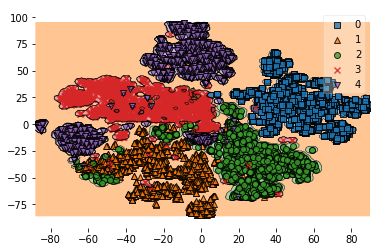

In [81]:
plot_decision_regions(X = tsne_images, y = labels, clf = classifier_rbf_tsne)

ValueError: cannot reshape array of size 4500 into shape (30,30)

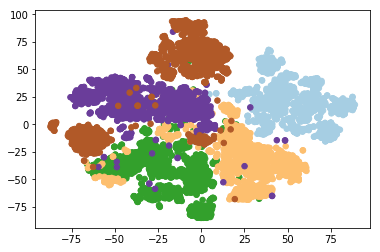

In [113]:
def plot_support_vectors(X, Y, clf):
    plt.scatter(X[:, 0], X[:, 1], c = Y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
#     clf = classifier
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
#     plt.show()

In [103]:
classifier = pickle.load( open( "classifier.p", "rb" ) )
C_rbf = classifier.best_params_.get("C")

In [136]:
classifier2 = svm.SVC(kernel = 'rbf', C = C_rbf)
classifier2.fit(train_set, labels)

test_set = []
test_labels = []
class_label = 0

for folder in os.listdir('Test_Handwritten_Hindi_dataset\Test\\'):
    path = 'Test_Handwritten_Hindi_dataset\Test\\' + folder + '\\'
    for file in os.listdir(path):
        img = mpimg.imread(path + file)
        img = img.reshape((img.shape[0]*img.shape[1]))
        test_labels.append(class_label)
        test_set.append(img)
    class_label += 1
    
y_predicted = classifier.predict(test_set)
print(accuracy_score(test_labels, y_predicted))

0.982


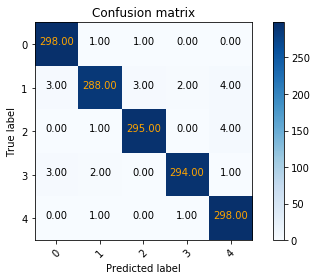

In [137]:
make_confusion_matrix(test_labels, y_predicted, 5)

In [132]:
def plot_roc_curve_multi_class_hindi(coordinates, labels, num_classes):
    fpr = dict()
    tpr = dict()
    area_under_curve = dict()
    y = label_binarize(labels, classes=[0, 1, 2, 3, 4])
    x_train, x_test, y_train, y_test = train_test_split(coordinates, y, test_size = 0.2)
    classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True))
    classifier.fit(x_train, y_train)
    y_score = classifier.decision_function(x_test)
#     fpr, tpr, thresholds = roc_curve(y_true, y_score)
#     area_under_curve = auc(fpr, tpr)
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        area_under_curve[i] = auc(fpr[i], tpr[i])
    
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    area_under_curve["micro"] = auc(fpr["micro"], tpr["micro"])
    
    
    plt.figure()
    lw = 2
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f)' % area_under_curve[i])

        plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

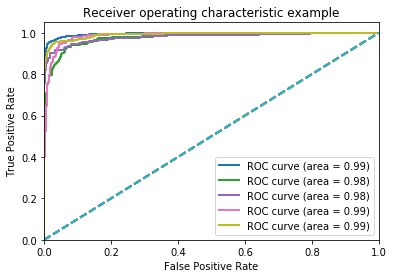

In [138]:
plot_roc_curve_multi_class_hindi(train_set, labels, 5)


In [ ]:
def make_confusion_matrix(y_test, y_predicted, num_classes):
    confusion_matrix = np.zeros(shape = (num_classes, num_classes))
    for i in range(len(y_test)):
        confusion_matrix[y_test[i], y_predicted[i]] += 1

    return confusion_matrix
        
#-----------------Following code reference was taken from Scikit learn website, but has been commented 
#-----------------as it was later clarified that there is no need to plot the confusion matrix-------#

#     plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
#     plt.title('Confusion matrix')
#     plt.colorbar()
#     classes = np.arange(num_classes)
#     tick_marks = np.arange(num_classes)
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f'
#     confusion_matrix = np.array(confusion_matrix)
#     thresh = confusion_matrix.max() / 2.
#     for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
#         plt.text(j, i, format(confusion_matrix[i, j], fmt),
#                  horizontalalignment="center",
#                  color="orange" if confusion_matrix[i, j] > thresh else "black")

#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.tight_layout()




In [ ]:
make_confusion_matrix()